#  How to Choose Best Models For Our Dataset
In this note we will practice to choose best models and hyper parameter tuning for best performance for our dataset but before that, we need to prepare our data with data prepocessing because this dataset have a lot a messy data like missing value, outlier, and imbalaced target class

#  Diabetes Data
This dataset classies patient data as either an onset of diabetes within five years or not. There are 768 examples and eight input variables. It is a binary classication problem investigated is whether the patient shows signs of diabetes according to World Health Organization criteria 

# Importing Libraries
imported different libraries where we will be working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.io import arff

# Importing Dataset

In [2]:
df = arff.loadarff(r'C:/Users/Reskur/Documents/Python/Portofolio/dataset_37_diabetes.arff')
dataset = pd.DataFrame(df[0])
dataset.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,b'tested_negative'
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,b'tested_positive'
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,b'tested_negative'
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,b'tested_positive'
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,b'tested_positive'


For Each Attribute: (all numeric-valued)

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (Target)

# Dataset Information
Here we can see that all the data types are in float type except 'Class' which is in Object type.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    float64
 1   plas    768 non-null    float64
 2   pres    768 non-null    float64
 3   skin    768 non-null    float64
 4   insu    768 non-null    float64
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    float64
 8   class   768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB


In [4]:
dataset['class'] = dataset['class'].str.decode('utf-8')

# Summary Statistics

In [5]:
dataset.describe().style.background_gradient()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


from table above we can see that this dataset have missing value, Specically, there are missing observations for some columns that are marked as a zero value. We can corroborate this by the denition of those columns and the domain knowledge that a zero value is invalid for those measures, e.g. a zero for body mass index or blood pressure is invalid. This zero value make our data distribution is skewed

# Data Visualization
From the graph below we can see that there are a lot of attributes which are positively or negatively distributed because a zero value.

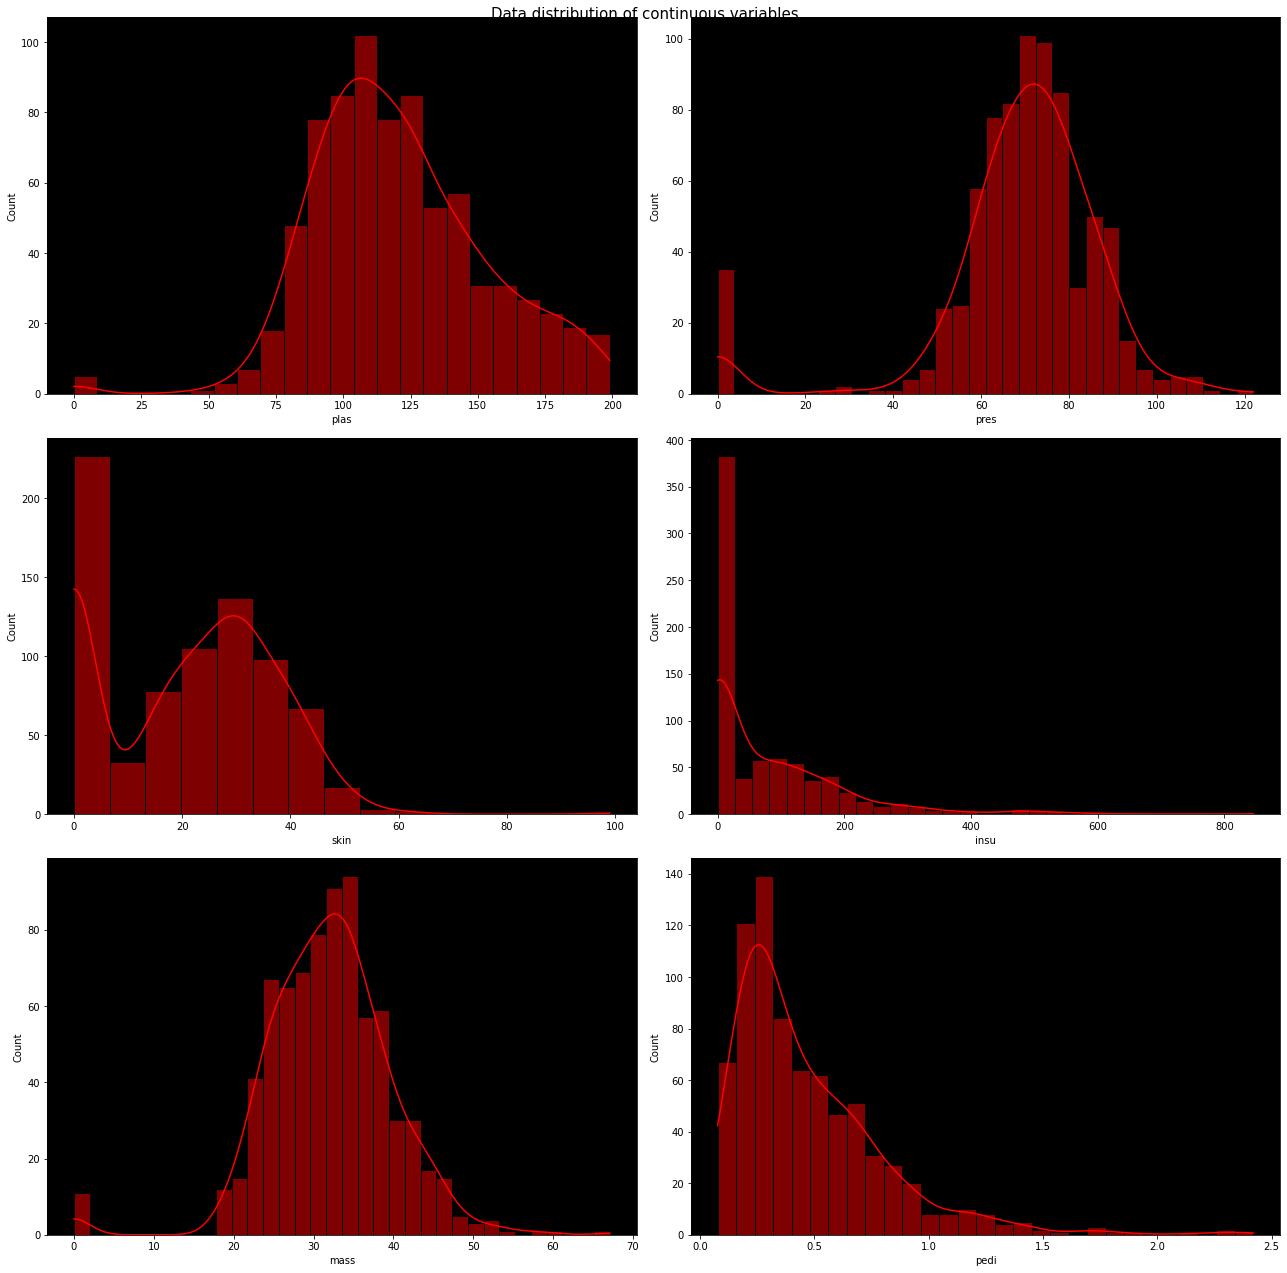

In [7]:
plot_data = ['plas', 'pres', 'skin', 'insu', 'mass', 'pedi']
plt.figure(figsize=(18, 18))
for i, col in enumerate(plot_data):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,2, i+1)
    sns.histplot(data=dataset, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables', size=15)
plt.tight_layout()

Let's see outlier with box plot, In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

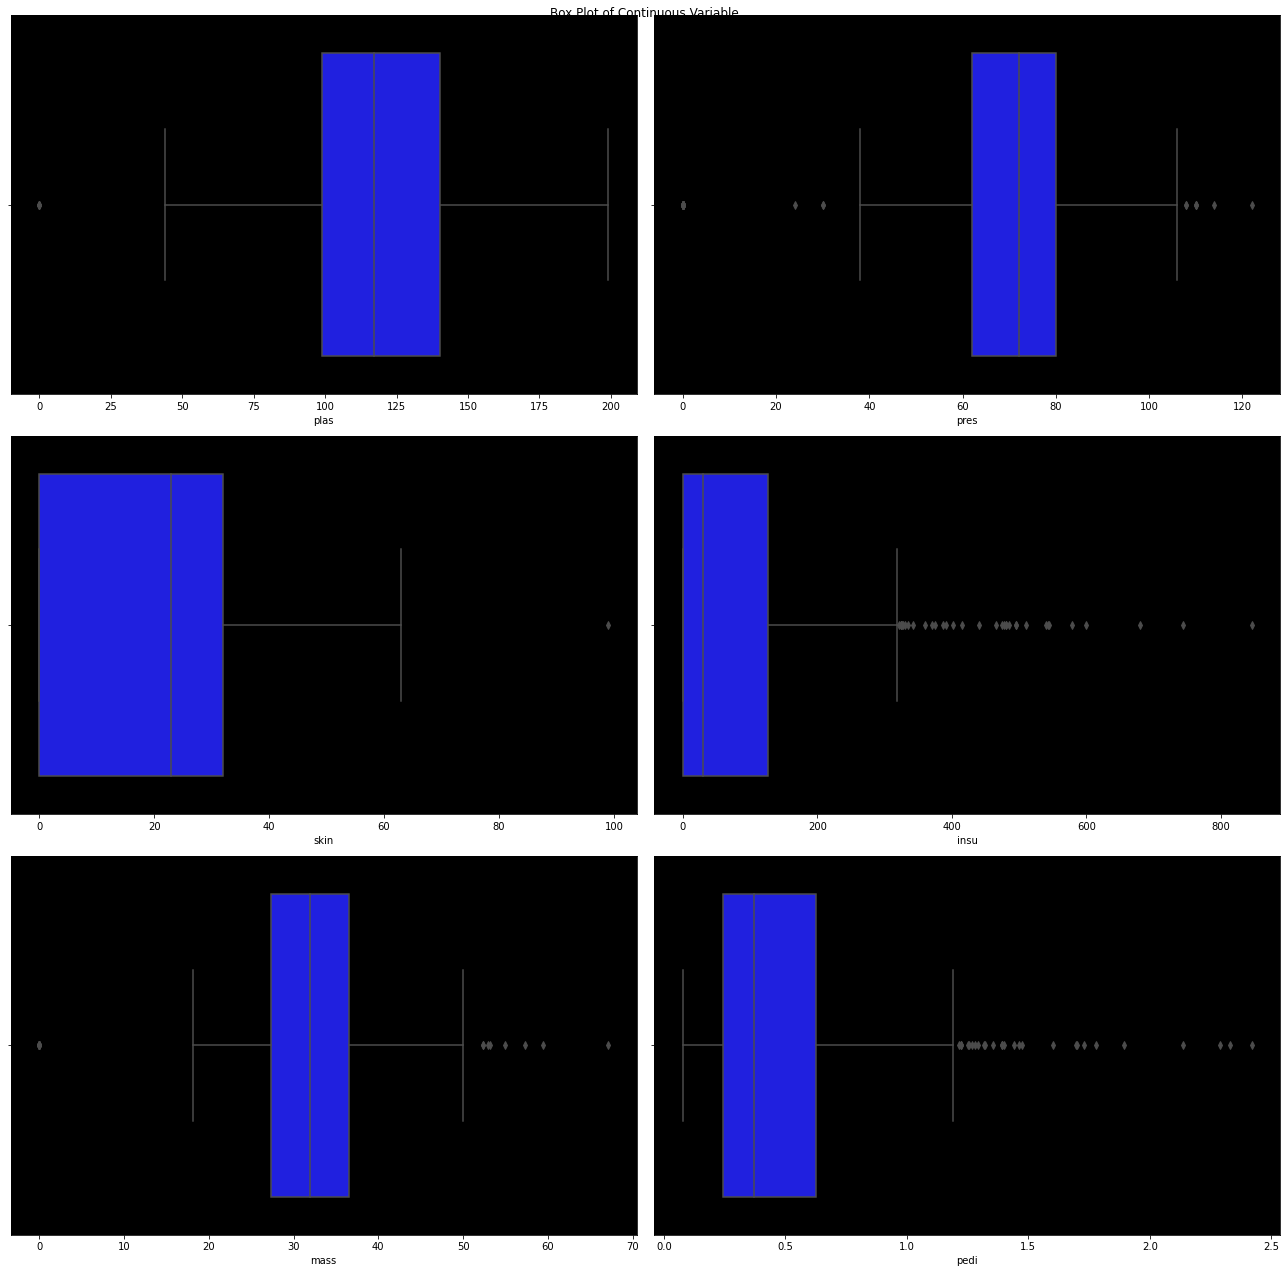

In [8]:
plt.figure(figsize=(18,18))
for i, col in enumerate(plot_data):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,2, i+1)
    sns.boxplot(data=dataset, x=col, ax=ax, color='blue')
plt.suptitle('Box Plot of Continuous Variable')
plt.tight_layout()
plt.show()

# Removing Outlier
This function below will replace the outliers with the median from the dataset

In [9]:
def outlier_treating(data, var):
    dataset=data.copy()
    def outlier_detector(data):
        outliers = []
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        IQR = q3 - q1
        ib = q1 - (IQR*1.5)
        ub = q3 + (IQR*1.5)
        for i, j in enumerate(data):
            if (j < ib or j > ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var = outlier_detector(dataset[i])
        dataset.loc[out_var, i] = np.median(dataset[i])
    return dataset

In [10]:
var = list(dataset.select_dtypes(include=['float64']).columns)
dataset = outlier_treating(dataset, var)

# Marking Missing Value
We can see from summary statistics above there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value. with outlier removing we did before zero values in some columns it's gone but not in column skin and insu, We will marking zero values with NaN in that columns and we will use statistical imputation 

In [11]:
from numpy import NaN
dataset[['skin', 'insu']] = dataset[['skin', 'insu']].replace(0, NaN)

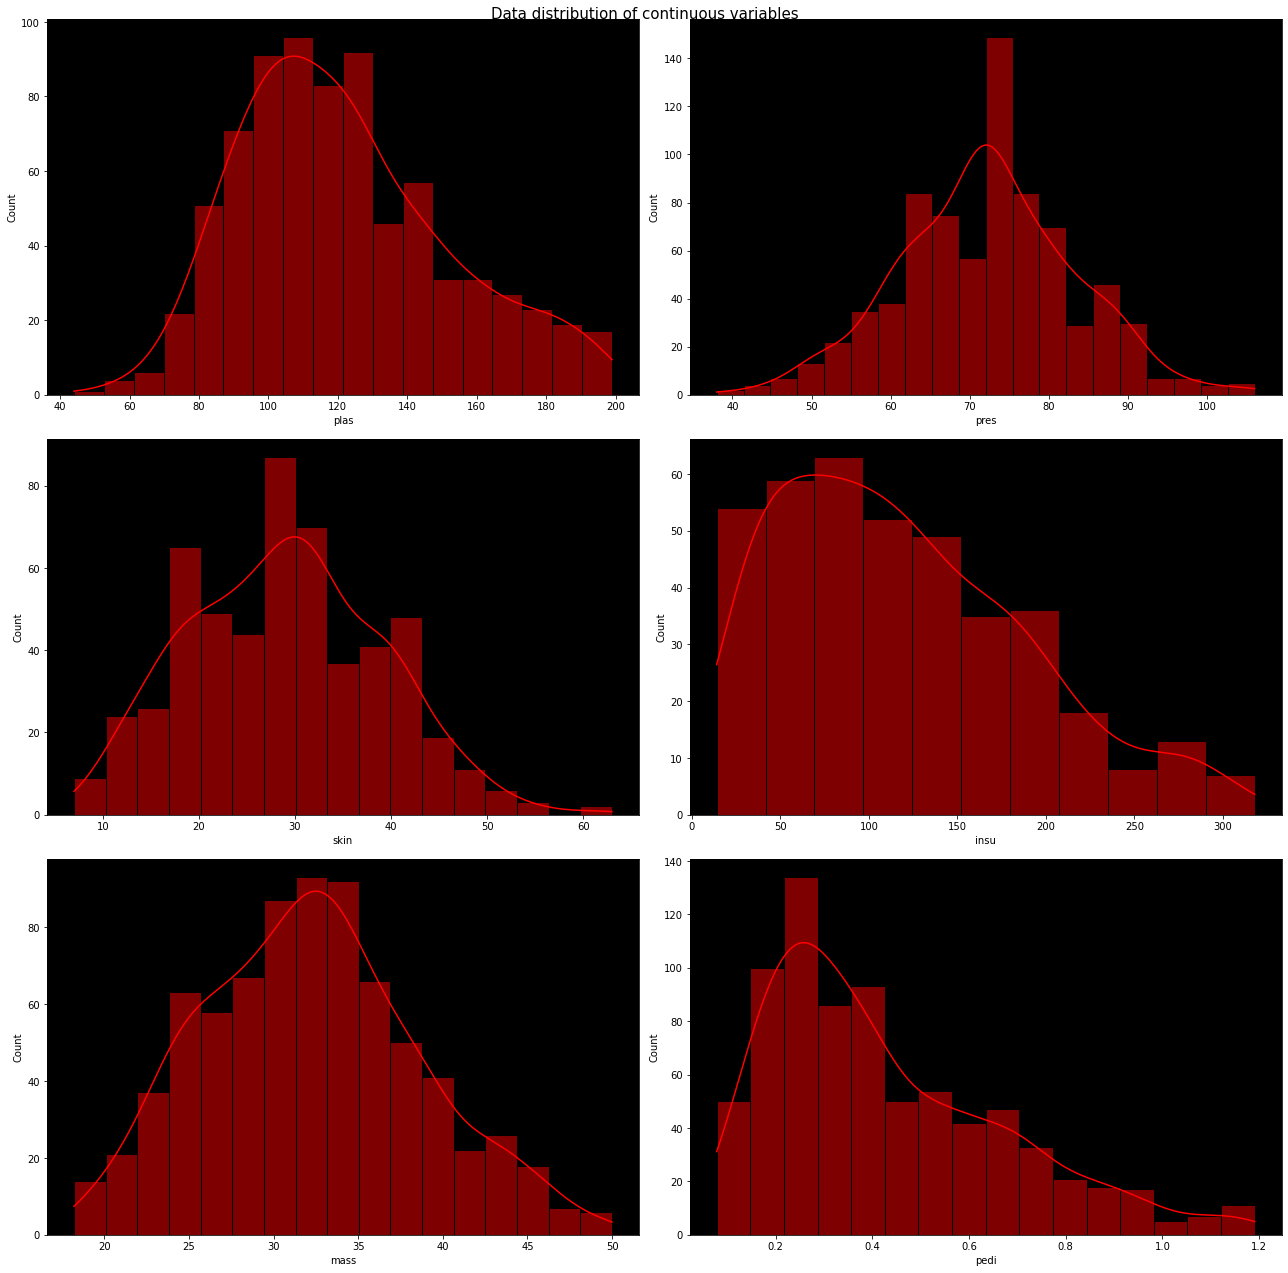

In [12]:
plot_data = ['plas', 'pres', 'skin', 'insu', 'mass', 'pedi']
plt.figure(figsize=(18, 18))
for i, col in enumerate(plot_data):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,2, i+1)
    sns.histplot(data=dataset, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables', size=15)
plt.tight_layout()

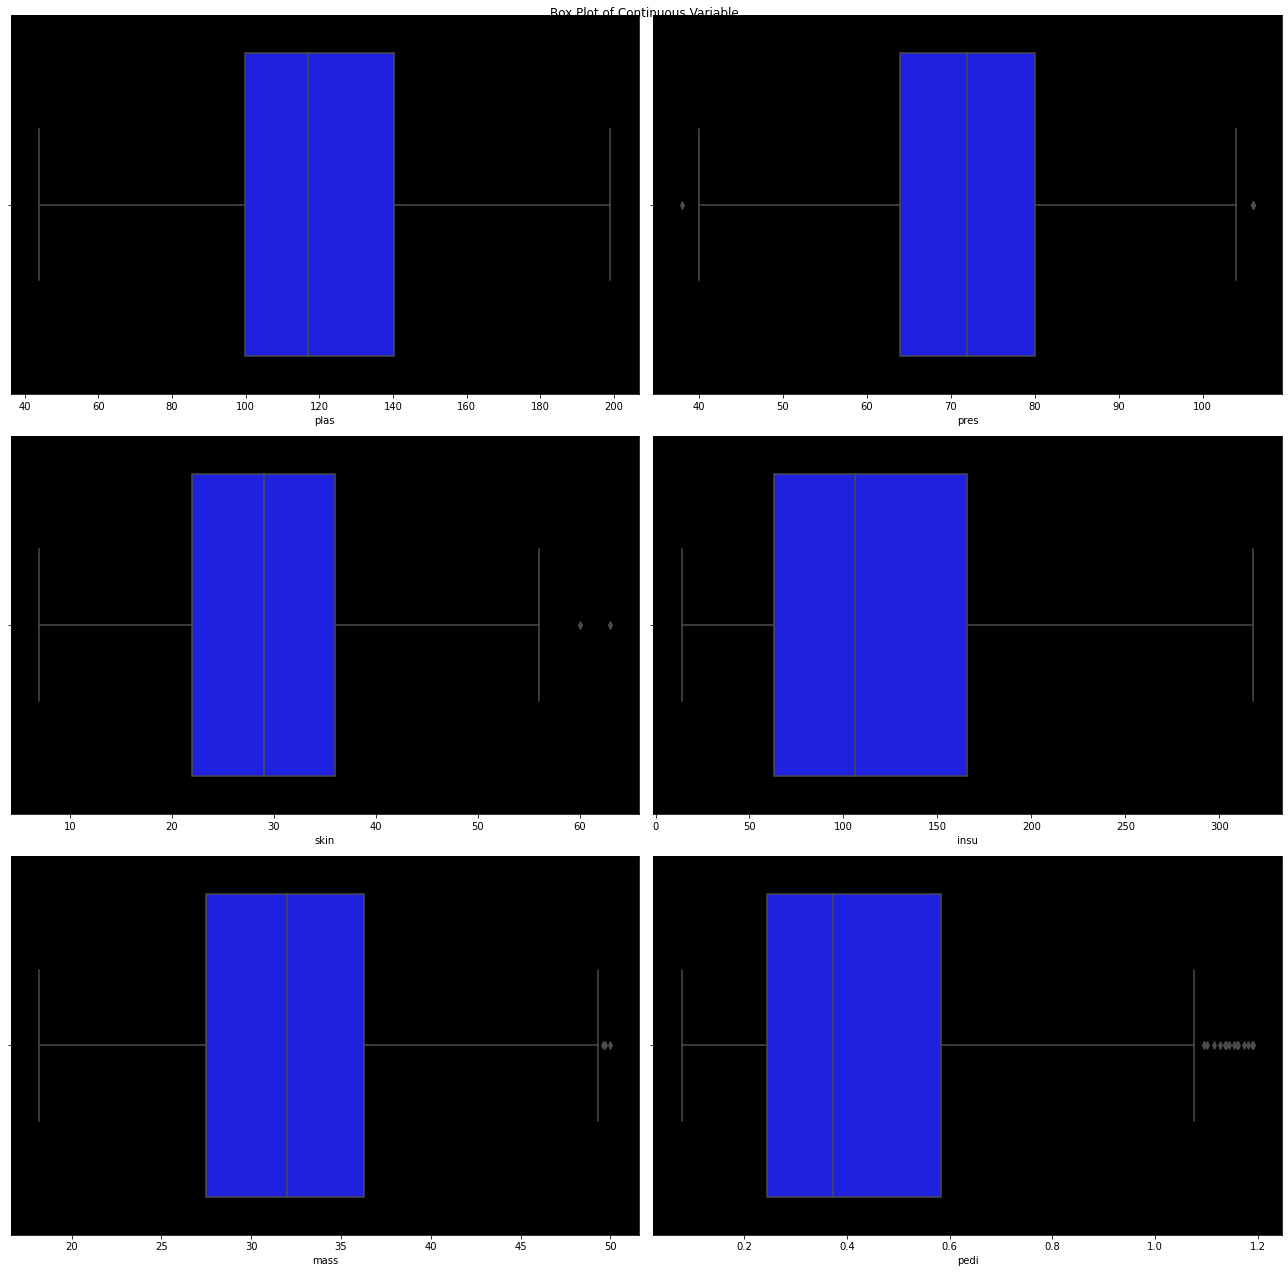

In [13]:
plt.figure(figsize=(18,18))
for i, col in enumerate(plot_data):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(3,2, i+1)
    sns.boxplot(data=dataset, x=col, ax=ax, color='blue')
plt.suptitle('Box Plot of Continuous Variable')
plt.tight_layout()
plt.show()

# Imbalaced Target Class
Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. We can see that our dataset highly imbalaced data, class 'tested_negative' have more data than class 'tested_positive'

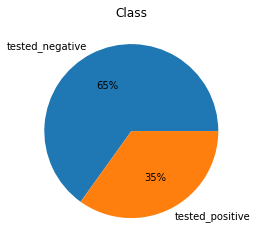

In [32]:
target_var=pd.crosstab(index=dataset['class'], columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Class')
plt.show()

In [15]:
x = dataset[['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi']]
y = dataset[['class']]

# Treating Missing Value with Statistical Imputation
A simple and popular approach to data imputation involves using statistical methods to estimate a value for a column from those values that are present, then replace all missing values in the column with the calculated statistic. It is simple because statistics are fast to calculate and it is popular because it often proves very efective. The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(x)
x = imputer.transform(x)

# Split Dataset

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=0)

# Treating Imbalaced Target Class
Pie chart tells that this is a case of Unbalanced data so we will SMOTE technique to oversample the data.

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
x_train,y_train = sm.fit_resample(xtrain,ytrain)

In [19]:
y_train.value_counts()

class          
tested_negative    343
tested_positive    343
dtype: int64

# Import Libraries for evaluating model

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [21]:
model_comparison = {}

# Let's Choose The Best Classification Model For Our Dataset

# Decision Tree

In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train, y_train)
y_pred = dt.predict(xtest)
print(f"Model Accuracy : {accuracy_score(y_pred, ytest)*100:.2f}%")
print(f'Model F1-Score : {f1_score(y_pred, ytest, average="weighted")*100:.2f}%')
accuracies = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=5)
print('cross_val_accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('cross_val_standard_Deviation : {:.2f}%'.format(accuracies.std()*100))
print(classification_report(y_pred, ytest, zero_division=1))
model_comparison['Decision Tree'] = [accuracy_score(y_pred, ytest), f1_score(y_pred, ytest, average='weighted'),
                                    (accuracies.mean()), (accuracies.std())]

Model Accuracy : 70.13%
Model F1-Score : 69.45%
cross_val_accuracy : 74.94%
cross_val_standard_Deviation : 3.51%
                 precision    recall  f1-score   support

tested_negative       0.73      0.81      0.77       140
tested_positive       0.65      0.53      0.58        91

       accuracy                           0.70       231
      macro avg       0.69      0.67      0.67       231
   weighted avg       0.70      0.70      0.69       231



# Naive Bayes

In [23]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(x_train, y_train.values.ravel())
y_pred = nv.predict(xtest)
print(f'Model Accuracy : {accuracy_score(y_pred, ytest)*100:.2f}%')
print(f'Model F1 Score : {f1_score(y_pred, ytest, average="weighted")*100:.2f}%')
accuracies = cross_val_score(estimator=nv, X=x_train, y=y_train.values.ravel(), cv=5)
print('cross val accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('cross val standard deviation : {:.2f}%'.format(accuracies.std()*100))
print(classification_report(y_pred, ytest, zero_division=1))
model_comparison['Naive Bayes'] = [accuracy_score(y_pred, ytest), f1_score(y_pred, ytest, average='weighted'),
                                  (accuracies.mean()), (accuracies.std())]

Model Accuracy : 77.06%
Model F1 Score : 76.94%
cross val accuracy : 72.59%
cross val standard deviation : 4.81%
                 precision    recall  f1-score   support

tested_negative       0.82      0.84      0.83       154
tested_positive       0.66      0.64      0.65        77

       accuracy                           0.77       231
      macro avg       0.74      0.74      0.74       231
   weighted avg       0.77      0.77      0.77       231



# Random Forest

In [24]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(x_train, y_train.values.ravel())
y_pred = rf.predict(xtest)
print(f'Model Accuracy : {accuracy_score(y_pred, ytest)*100:.2f}%')
print(f'Model F1 Score : {f1_score(y_pred, ytest, average="weighted")*100:.2f}')
accuracies = cross_val_score(estimator=rf, X=x_train, y=y_train.values.ravel(), cv=5)
print('cross val accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('croos standard deviation : {:.2f}%'.format(accuracies.std()*100))
print(classification_report(y_pred, ytest, zero_division=1))
model_comparison['Random Forest'] = [accuracy_score(y_pred, ytest), f1_score(y_pred, ytest, average='weighted'),
                                    (accuracies.mean()), (accuracies.std())]

Model Accuracy : 73.59%
Model F1 Score : 73.74
cross val accuracy : 77.41%
croos standard deviation : 4.57%
                 precision    recall  f1-score   support

tested_negative       0.82      0.80      0.81       160
tested_positive       0.57      0.59      0.58        71

       accuracy                           0.74       231
      macro avg       0.69      0.70      0.69       231
   weighted avg       0.74      0.74      0.74       231



# KNN

In [25]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(x_train, y_train.values.ravel())
y_pred=knn.predict(xtest)
print(f'Model accuracy : {accuracy_score(y_pred, ytest)*100:.2f}%')
print(f'Model F1 Score : {f1_score(y_pred, ytest, average="weighted")*100:.2f}%')
accuracies = cross_val_score(estimator=knn, X=x_train, y=y_train.values.ravel(), cv=5)
print('cross val accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('cross val Standar Deviation : {:.2f}%'.format(accuracies.std()*100))
print(classification_report(y_pred, ytest, zero_division=1))
model_comparison['KNN'] = [accuracy_score(y_pred, ytest), f1_score(y_pred, ytest, average='weighted'),
                               (accuracies.mean()), (accuracies.std())]

Model accuracy : 72.29%
Model F1 Score : 71.95%
cross val accuracy : 75.80%
cross val Standar Deviation : 5.53%
                 precision    recall  f1-score   support

tested_negative       0.77      0.81      0.79       149
tested_positive       0.62      0.56      0.59        82

       accuracy                           0.72       231
      macro avg       0.70      0.69      0.69       231
   weighted avg       0.72      0.72      0.72       231



# Support Vector Machine

In [26]:
#SVM
from sklearn import svm
svm = svm.SVC(gamma='auto', kernel='rbf') 
svm.fit(x_train, y_train.values.ravel())
y_pred=knn.predict(xtest)
print(f'Model accuracy : {accuracy_score(y_pred, ytest)*100:.2f}%')
print(f'Model F1 Score : {f1_score(y_pred, ytest, average="weighted")*100:.2f}%')
accuracies = cross_val_score(estimator=svm, X=x_train, y=y_train.values.ravel(), cv=5)
print('cross val accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('cross val Standar Deviation : {:.2f}%'.format(accuracies.std()*100))
print(classification_report(y_pred, ytest, zero_division=1))
model_comparison['svm'] = [accuracy_score(y_pred, ytest), f1_score(y_pred, ytest, average='weighted'),
                               (accuracies.mean()), (accuracies.std())]

Model accuracy : 72.29%
Model F1 Score : 71.95%
cross val accuracy : 72.60%
cross val Standar Deviation : 7.77%
                 precision    recall  f1-score   support

tested_negative       0.77      0.81      0.79       149
tested_positive       0.62      0.56      0.59        82

       accuracy                           0.72       231
      macro avg       0.70      0.69      0.69       231
   weighted avg       0.72      0.72      0.72       231



# Model Comparison
from table result below we can see that Naive Bayes have a good result

In [27]:
model_com_df = pd.DataFrame(model_comparison).T
model_com_df.columns = ['Model Accuracy', 'Model F1 Score', 'CV Accuracy', 'CV STD']
model_com_df = model_com_df.sort_values(by='Model F1 Score', ascending=False)
model_com_df.style.format('{:.2f}').background_gradient(cmap='Blues')

,Model Accuracy,Model F1 Score,CV Accuracy,CV STD
Naive Bayes,0.77,0.77,0.73,0.05
Random Forest,0.74,0.74,0.77,0.05
KNN,0.72,0.72,0.76,0.06
svm,0.72,0.72,0.73,0.08
Decision Tree,0.70,0.69,0.75,0.04


# Hyper Parameter Tuning
from model comparison Naive Bayes have a good result, but after we tuning the parameter random forest make a better result than other model.

In [28]:
model_params = {
    'nv':{
        'model' : GaussianNB(),
        'params' : {
            'var_smoothing' : np.logspace(0, -9, num=100)
        }
    },
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : np.arange(10,210,10)
        }
    },
    'knn':{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : np.arange(5,25,5)
        }
    }
}

In [29]:
scores = []
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train.values.ravel())
    scores.append({'model':model_name, 'best_scores':clf.best_score_, 'best_params':clf.best_params_})
tuning = pd.DataFrame(scores, columns=['model', 'best_scores', 'best_params']) 

In [30]:
print(tuning.sort_values(by='best_scores', ascending=False))

           model  best_scores              best_params
1  random_forest     0.804676     {'n_estimators': 90}
2            knn     0.758003       {'n_neighbors': 5}
0             nv     0.734624  {'var_smoothing': 0.01}


after tuning the parameters we get random forest with much better result